# 2007 Flights Data Exploration
## by Kim Gahn

## Preliminary Wrangling

> This dataset was provided by RITA and contains information for more than 7 million flights originating in the United States in 2007. Data includes both actual and expected departure and arrival times, cancellation information, origin and destination information, and delays. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from urllib.request import urlopen

%matplotlib inline


In [2]:
# Read data into pandas dataframe
# REF: Data downloaded from https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/HG7NV7/2BHLWK&version=1.0
df_flights = pd.read_csv('flights_2007.csv')

In [3]:
#Look at head
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


In [4]:
# View info for datatypes, number of rows and columns, and null data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


In [5]:
# Define function that will take in the columns for date and all times, and convert into a single datetime value
def convert_datetime(date_to, year, month, day, time, date_time):
    date_to = year.astype(str) + '-' + month.astype(str) + '-' + day.astype(str)
    time = time.astype(str)
    date_time = date_to + ' ' + time.apply(lambda x: x[:-2]) + ':' + time.apply(lambda x: x[-2:])
    date_time = pd.to_datetime(date_time, errors='coerce')
    return date_time

In [6]:
# Convert necessary collumns from integer into datetime datatype

# Create column names
df_flights['Date'] = ''
df_flights['DepDateTime'] = ''
df_flights['CRSDepDateTime'] = ''
df_flights['ArrDateTime'] = ''
df_flights['CRSArrDateTime'] = ''

# Fill null values prior to conversion to avoid errors
df_flights['DepTime'] = df_flights['DepTime'].fillna(0)
df_flights['ArrTime'] = df_flights['ArrTime'].fillna(0)


# Convert times with float datatype to int
df_flights['DepTime'] = df_flights['DepTime'].astype(int)
df_flights['ArrTime'] = df_flights['ArrTime'].astype(int)

# Call convert_datetime function for each column time
df_flights['DepDateTime'] = convert_datetime(df_flights['Date'], df_flights['Year'], df_flights['Month'], df_flights['DayofMonth'], df_flights['DepTime'], df_flights['DepDateTime'])
df_flights['CRSDepDateTime'] = convert_datetime(df_flights['Date'], df_flights['Year'], df_flights['Month'], df_flights['DayofMonth'], df_flights['CRSDepTime'], df_flights['CRSDepDateTime'])
df_flights['ArrDateTime'] = convert_datetime(df_flights['Date'], df_flights['Year'], df_flights['Month'], df_flights['DayofMonth'], df_flights['ArrTime'], df_flights['ArrDateTime'])
df_flights['CRSArrDateTime'] = convert_datetime(df_flights['Date'], df_flights['Year'], df_flights['Month'], df_flights['DayofMonth'], df_flights['ArrTime'], df_flights['CRSArrDateTime'])

# Drop excess time/date columns and view head
df_flights.drop(['Year', 'Month', 'DayofMonth', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'Date'], axis=1, inplace = True)
df_flights.head(1)

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDateTime,CRSDepDateTime,ArrDateTime,CRSArrDateTime
0,1,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,...,0,0,0,0,0,0,2007-01-01 12:32:00,2007-01-01 12:25:00,2007-01-01 13:41:00,2007-01-01 13:41:00


In [7]:
# Look at info to make sure the datatypes have changed to datetime
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 26 columns):
DayOfWeek            int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
DepDateTime          datetime64[ns]
CRSDepDateTime       datetime64[ns]
ArrDateTime          datetime64[ns]
CRSArrDateTime       datetime64[ns]
dtypes: datetime64[ns](4), float64(5), int64(12), object(5)
memory usage: 1.4+ GB


In [8]:
# Look at basic statistics
df_flights.describe()

,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7.453215e+06,7.453215e+06,7.275288e+06,7.452221e+06,7.275288e+06,7.275288e+06,7.292467e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06,7.453215e+06
mean,3.933804e+00,2.188099e+03,1.263223e+02,1.272502e+02,1.028159e+02,1.019218e+01,1.139914e+01,7.198058e+02,6.691984e+00,1.630015e+01,2.156761e-02,2.304911e-03,3.865236e+00,7.700904e-01,3.783702e+00,2.373553e-02,5.099134e+00
std,1.992267e+00,1.971958e+03,7.118009e+01,7.035750e+01,6.824577e+01,3.930774e+01,3.614189e+01,5.623051e+02,5.151351e+00,1.183396e+01,1.452668e-01,4.795413e-02,2.084240e+01,9.619547e+00,1.617670e+01,1.084995e+00,2.127753e+01
min,1.000000e+00,1.000000e+00,1.200000e+01,-1.240000e+03,0.000000e+00,-3.120000e+02,-3.050000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.900000e+02,7.600000e+01,7.700000e+01,5.500000e+01,-9.000000e+00,-4.000000e+00,3.190000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.509000e+03,1.080000e+02,1.100000e+02,8.400000e+01,0.000000e+00,0.000000e+00,5.690000e+02,5.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,3.553000e+03,1.560000e+02,1.560000e+02,1.310000e+02,1.400000e+01,1.100000e+01,9.460000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.000000e+00,9.602000e+03,1.270000e+03,1.430000e+03,1.257000e+03,2.598000e+03,2.601000e+03,4.962000e+03,5.450000e+02,5.300000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.386000e+03,3.820000e+02,1.031000e+03


In [9]:
df_flights.isna().sum()

DayOfWeek                  0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
DepDateTime           186576
CRSDepDateTime          9868
ArrDateTime           278907
CRSArrDateTime        278907
dtype: int64

In [10]:
# Read carriers.csv to dataframe and view head
# REF: Data downloaded from http://stat-computing.org/dataexpo/2009/supplemental-data.html
df_carriers = pd.read_csv('carriers.csv')
df_carriers.head(1)

,Code,Description
0,02Q,Titan Airways


In [11]:
# Change code to UniqueCarrier so the carrier name can be added to flights dataframe
df_carriers.rename(columns={'Code':'UniqueCarrier', 'Description':'CarrierName'}, inplace=True)

In [12]:
#Join carriers dataframe with flights dataframe and view head
df_flights = df_flights.merge(df_carriers, on ='UniqueCarrier', how='left')
df_flights.head()

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDateTime,CRSDepDateTime,ArrDateTime,CRSArrDateTime,CarrierName
0,1,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,...,0,0,0,0,0,2007-01-01 12:32:00,2007-01-01 12:25:00,2007-01-01 13:41:00,2007-01-01 13:41:00,Southwest Airlines Co.
1,1,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,...,0,0,0,0,0,2007-01-01 19:18:00,2007-01-01 19:05:00,2007-01-01 20:43:00,2007-01-01 20:43:00,Southwest Airlines Co.
2,1,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,...,3,0,0,0,31,2007-01-01 22:06:00,2007-01-01 21:30:00,2007-01-01 23:34:00,2007-01-01 23:34:00,Southwest Airlines Co.
3,1,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,...,23,0,0,0,3,2007-01-01 12:30:00,2007-01-01 12:00:00,2007-01-01 13:56:00,2007-01-01 13:56:00,Southwest Airlines Co.
4,1,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,...,0,0,0,0,0,2007-01-01 08:31:00,2007-01-01 08:30:00,2007-01-01 09:57:00,2007-01-01 09:57:00,Southwest Airlines Co.


In [13]:
# Read in airports.csv and view head
# REF: Data downloaded from http://stat-computing.org/dataexpo/2009/supplemental-data.html
df_airports = pd.read_csv('airports.csv')
df_airports.head(1)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505


In [14]:
df_airports['location']=df_airports['city']+', '+df_airports['state']+' '+df_airports['country']
df_airports.head(1)

,iata,airport,city,state,country,lat,long,location
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505,"Bay Springs, MS USA"


In [15]:
# Drop unnecessary columns
df_airports.drop(['city', 'state', 'country', 'lat', 'long'], axis=1, inplace = True)

# Capitalize column names for combining with flights dataframe
df_airports.rename(columns={'airport':'Airport', 'location':'Location'}, inplace=True)

df_airports.head(1)

,iata,Airport,Location
0,00M,Thigpen,"Bay Springs, MS USA"


In [16]:
#Join airports dataframe with flights dataframe to add origin info and view head
df_flights = df_flights.merge(df_airports, how='left', left_on ='Origin', right_on = 'iata')
df_flights.rename(columns={'iata':'Oriata', 'Airport':'OrAirport', 'Location':'OrLocation'}, inplace=True)
df_flights.head(1)

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,SecurityDelay,LateAircraftDelay,DepDateTime,CRSDepDateTime,ArrDateTime,CRSArrDateTime,CarrierName,Oriata,OrAirport,OrLocation
0,1,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,...,0,0,2007-01-01 12:32:00,2007-01-01 12:25:00,2007-01-01 13:41:00,2007-01-01 13:41:00,Southwest Airlines Co.,SMF,Sacramento International,"Sacramento, CA USA"


In [17]:
#Join carriers dataframe with flights dataframe to add destination info and view head
df_flights = df_flights.merge(df_airports, how='left', left_on ='Dest', right_on = 'iata')
df_flights.rename(columns={'iata':'Deiata', 'Airport':'DeAirport', 'Location':'DeLocation'}, inplace=True)

df_flights.head(1)

,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,CRSDepDateTime,ArrDateTime,CRSArrDateTime,CarrierName,Oriata,OrAirport,OrLocation,Deiata,DeAirport,DeLocation
0,1,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,...,2007-01-01 12:25:00,2007-01-01 13:41:00,2007-01-01 13:41:00,Southwest Airlines Co.,SMF,Sacramento International,"Sacramento, CA USA",ONT,Ontario International,"Ontario, CA USA"


In [18]:
# Drop excess columns
df_flights.drop(['Oriata', 'Deiata'], axis=1, inplace = True)

In [19]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453215 entries, 0 to 7453214
Data columns (total 31 columns):
DayOfWeek            int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
DepDateTime          datetime64[ns]
CRSDepDateTime       datetime64[ns]
ArrDateTime          datetime64[ns]
CRSArrDateTime       datetime64[ns]
CarrierName          object
OrAirport            object
OrLocation           object
DeAirport            object
DeLocation           o

### What is the structure of your dataset?

> This dataset has 7,453,215 airline flights from 2007 broken up into 31 attributes.

### What is/are the main feature(s) of interest in your dataset?

> Arrival and departure times (expected and actual), airline, and location information.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The most helpful information will be the expected and actual arrival and departure times.  


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

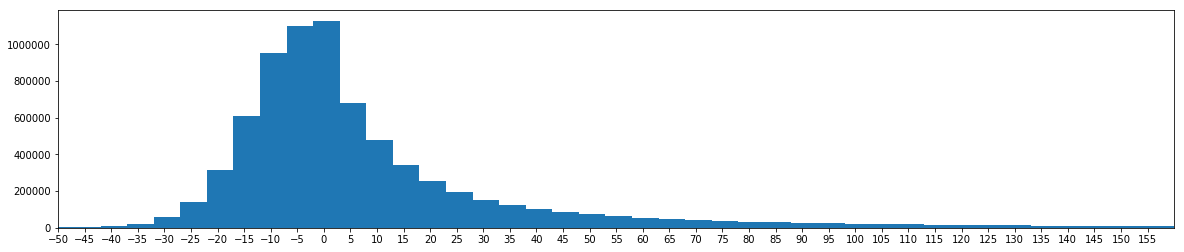

In [20]:
# Plot arrival delays
plt.figure(figsize = [20,4])
step = 5
x_min, x_max = -50, 160
bins = np.arange(df_flights.ArrDelay.min()-step, df_flights.ArrDelay.max() + step, step)
plt.hist(df_flights.ArrDelay.replace(np.nan, 0), bins = bins)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

> It looks like the majority of flights are on time or within an hour different than expected, and almost half arrive before they were expected

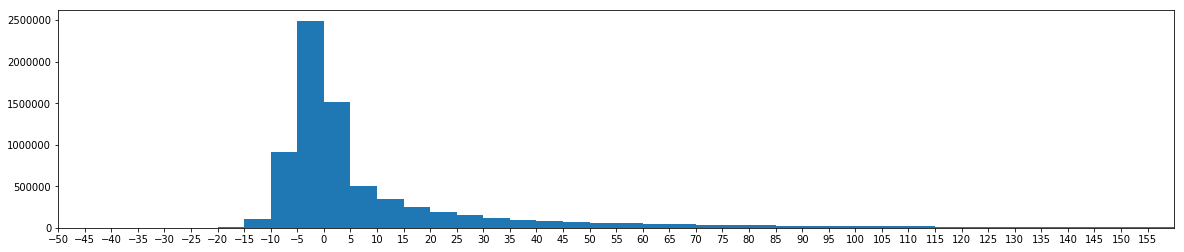

In [21]:
# Plot departure delays
plt.figure(figsize = [20,4])
step = 5
x_min, x_max = -50, 160
bins = np.arange(df_flights.DepDelay.min()-step, df_flights.DepDelay.max() + step, step)
plt.hist(df_flights.DepDelay.replace(np.nan, 0), bins = bins)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

> Again it looks like the overwhelming majority of flights depart on time or within an hour of the scheduled time.

In [22]:
# Calculate cancellations
df_flights.Cancelled.value_counts()

0    7292467
1     160748
Name: Cancelled, dtype: int64

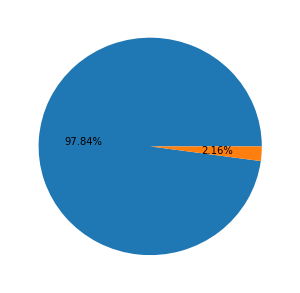

In [23]:
# Plot cancellations using a pie chart to emphasize distribution
plt.figure(figsize = [5,5])
plt.pie(df_flights.Cancelled.value_counts(), autopct = '%.2f%%');

> It appears that only a small percentage of flights are actually cancelled

In [24]:
# Display the counts for each type of cancellation
codes = {'A':'Carrier', 'B':'Weather', 'C':'National Aviation System', 'D':'Security'}
cancels = df_flights.CancellationCode.value_counts()
cancels = cancels.rename(codes)
cancels

Carrier                     66779
Weather                     61936
National Aviation System    31995
Security                       39
Name: CancellationCode, dtype: int64

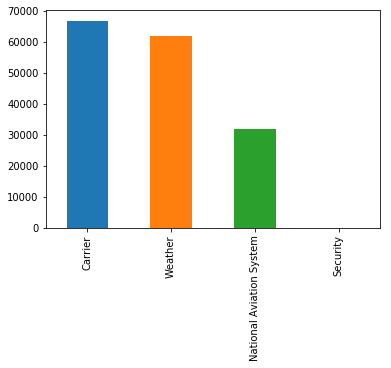

In [25]:
# Plot the cancellation codes using a countplot
cancels.plot(kind = 'bar');

> Very few flights are cancelled due to security (only 39).  The majority of cancellations are decided by the airline.

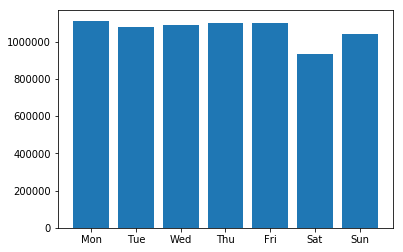

In [26]:
# Plot flights per day of week
width = 1
bins = np.arange(1, 9, width)
plt.hist(df_flights.DayOfWeek, rwidth = .8 , bins = bins)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

> The weekdays look fairly even in the number of flights, and Saturday has the least amount of flights.

In [27]:
# Calculate top 30 origin cities
or_cities = df_flights['OrLocation'].value_counts()
or_cities = or_cities.nlargest(30)
or_cities

Chicago, IL USA              471647
Atlanta, GA USA              413851
Dallas-Fort Worth, TX USA    297345
Houston, TX USA              256960
New York, NY USA             249265
Denver, CO USA               240928
Los Angeles, CA USA          237597
Phoenix, AZ USA              211072
Las Vegas, NV USA            183668
Detroit, MI USA              177478
Minneapolis, MN USA          155846
Newark, NJ USA               154113
Salt Lake City, UT USA       147808
San Francisco, CA USA        138491
Orlando, FL USA              129778
Boston, MA USA               128320
Charlotte, NC USA            127108
Covington, KY USA            110509
Baltimore, MD USA            109385
Seattle, WA USA              109127
Philadelphia, PA USA         104063
San Diego, CA USA             97316
Chantilly, VA USA             91048
Arlington, VA USA             89666
Memphis, TN USA               85034
Tampa, FL USA                 79785
Cleveland, OH USA             78288
Oakland, CA USA             

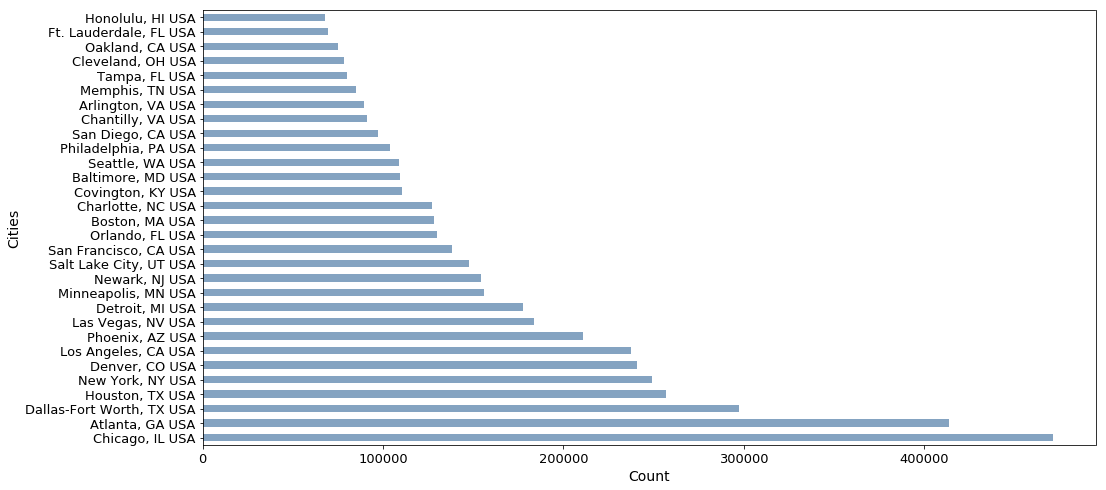

In [28]:
# Plot top 30 arrival cities
or_cities.plot(kind='barh',figsize = (16,8),fontsize = 13, color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel('Count',fontsize = 14)
plt.ylabel('Cities',fontsize = 14)
sb.set_style("whitegrid");

> It looks like the collected data is focused on flights originating in the United States, as many other larger cities in the world do not appear among the top 30 cities.

In [29]:
# Calculate top 30 destination cities
de_cities = df_flights['DeLocation'].value_counts()
de_cities = de_cities.nlargest(30)
de_cities

Chicago, IL USA              471572
Atlanta, GA USA              413805
Dallas-Fort Worth, TX USA    297481
Houston, TX USA              256949
New York, NY USA             249215
Denver, CO USA               240758
Los Angeles, CA USA          237676
Phoenix, AZ USA              211098
Las Vegas, NV USA            183691
Detroit, MI USA              177471
Minneapolis, MN USA          155832
Newark, NJ USA               154093
Salt Lake City, UT USA       147789
San Francisco, CA USA        138422
Orlando, FL USA              129801
Boston, MA USA               128285
Charlotte, NC USA            127116
Covington, KY USA            110552
Baltimore, MD USA            109354
Seattle, WA USA              109147
Philadelphia, PA USA         104056
San Diego, CA USA             97302
Chantilly, VA USA             91025
Arlington, VA USA             89667
Memphis, TN USA               85025
Tampa, FL USA                 79794
Cleveland, OH USA             78309
Oakland, CA USA             

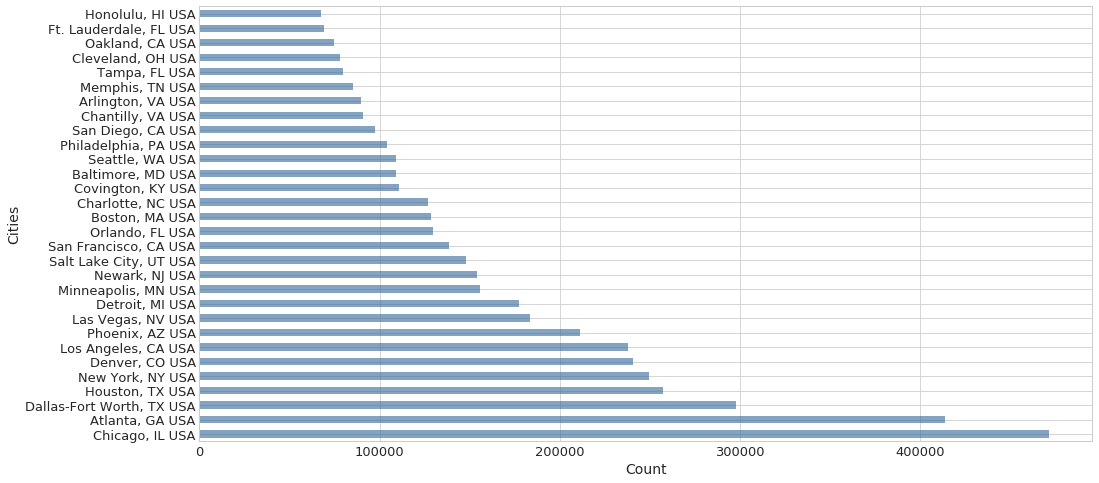

In [30]:
# Plot top 30 destinatiom cities
de_cities.plot(kind='barh',figsize = (16,8),fontsize = 13, color = (0.2, 0.4, 0.6, 0.6))
plt.xlabel('Count',fontsize = 14)
plt.ylabel('Cities',fontsize = 14)
sb.set_style("whitegrid");

> The frequency for departure and arrival cities looks almost identical.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I was surprised to see that most flights are not terribly off schedule, and that cancellations are not very frequent.  I did not see the need to perform any transformations, the distributions seemed normal for the numerical data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Earlier prior to the beginning of the univariate analysis, I adjusted a few columns such as taking the multiple columns associated with dates and times and combining them into single datetime objects by category.  Also, I merged in the location and carrier data to make it more descriptive.  During the analysis, I changed the labels for the cancellation code to the actual description to make it more informative.  As stated above, I did not note any strange distributions.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

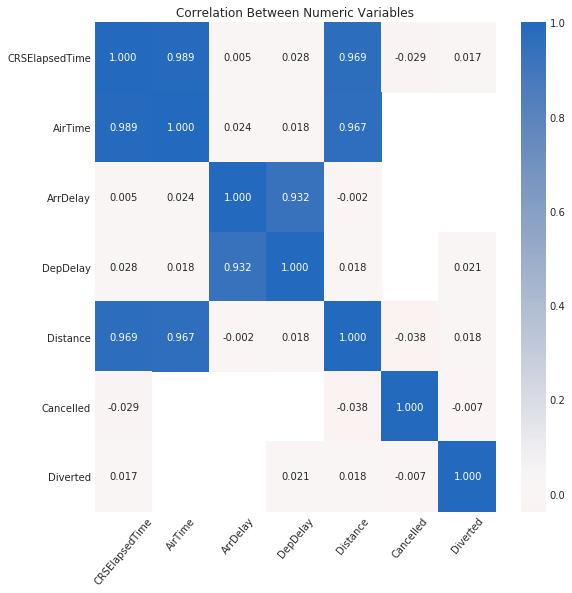

In [31]:
# Plot pairwise correlation to look for relationships between numeric variables
num_vars = ['CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'Cancelled', 'Diverted']
plt.figure(figsize = [9, 9])
yticks = df_flights.index
keptticks = yticks[::int(len(yticks)/10)]
yticks = ['' for y in yticks]
yticks[::int(len(yticks)/10)] = keptticks
xticks = df_flights.columns
keptticks = xticks[::int(len(xticks)/10)]
xticks = ['' for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks
sb.heatmap(df_flights[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.yticks(rotation = 0) 
plt.xticks(rotation = 50)
plt.title('Correlation Between Numeric Variables')
plt.show()

> This pairwise correlation plot shows correlations between expected variables (ex. a longer distance means more elapsed time, a departure delay results in an arrival delay).

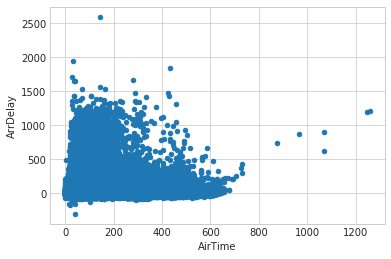

In [32]:
# Plot the relationship between airtime and arrival delay
df_flights.plot.scatter(x = 'AirTime', y = 'ArrDelay')
plt.show()

> There appears to be no relationship between the amount of time in air and arrival delays.

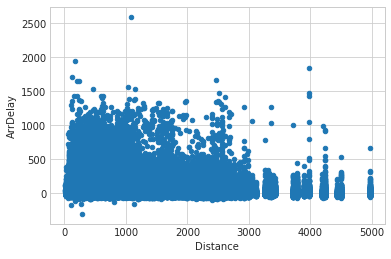

In [33]:
# Plot the relationship between airtime and arrival delay
df_flights.plot.scatter(x = 'Distance', y = 'ArrDelay')
plt.show()

> It does not appear that distance affects arrival delays.

In [20]:
# Single out the hour from the datetime object
df_flights['CRSDepHour'] = df_flights.CRSDepDateTime.dt.hour
df_flights['CRSDepHour'].dropna(inplace = True)
df_flights['CRSDepHour'] = df_flights['CRSDepHour'].astype(int) 

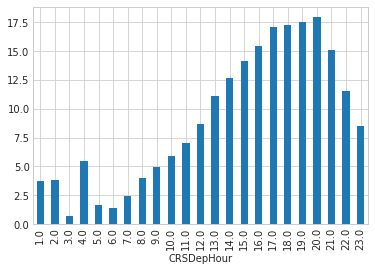

In [35]:
# Plot the arrival delays by hour
df_flights.groupby('CRSDepHour').agg({'ArrDelay':'mean'}).plot.bar(legend = None)
plt.show()

> Delays definitly increase as the day goes on.  In my experience most flights for a day begin at 5 a.m. and at that time until mid morning, delays are very small.

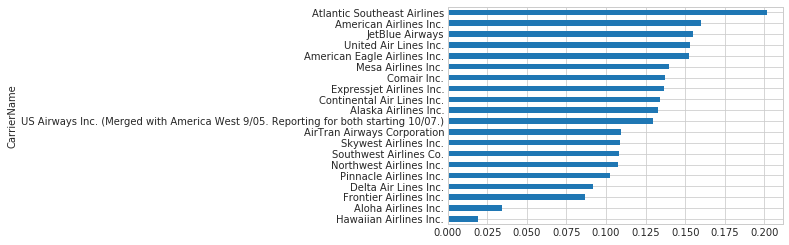

In [36]:
# Plot airlines with delays more than 30 minutes
delay_carrier = df_flights.groupby(['CarrierName']).agg({'DepDelay':lambda x: (x>30).sum()/len(x)}).sort_values('DepDelay')
delay_carrier.plot(kind = 'barh', legend = None)
plt.show();

> Atlantic Southeast, American, JetBlue, and United airlines tend to have the most delays over 30 minutes.  Delta, Frontier, Aloha, and Hawaiian airlines tend to have fewer delays over 30 minutes.

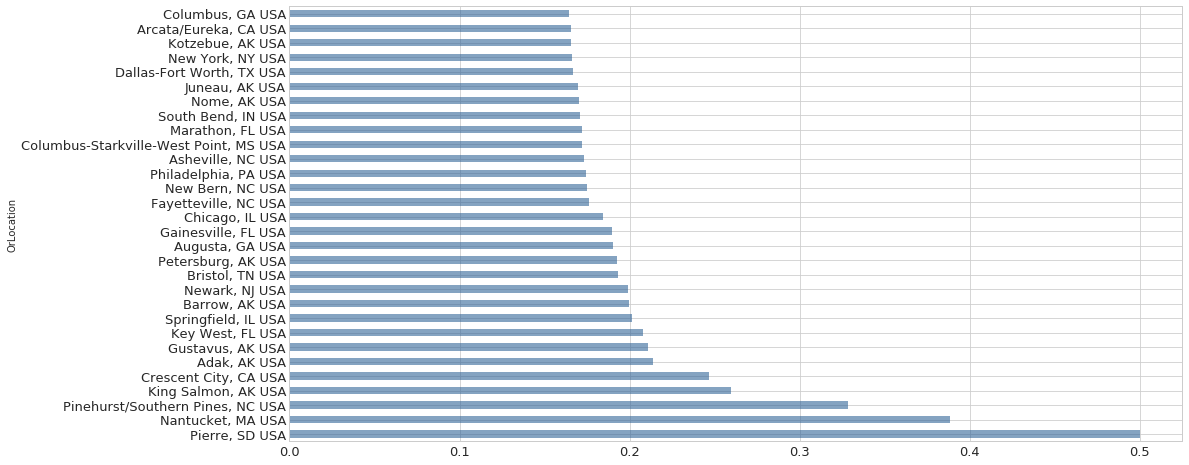

In [37]:
# Plot airports with delays more than 30 minutes
delay_origin = df_flights.groupby(['OrLocation']).agg({'DepDelay':lambda x: (x>30).sum()/len(x)}).sort_values('DepDelay')
delay_origin = delay_origin['DepDelay'].nlargest(30)
delay_origin.plot(kind = 'barh', legend = None, figsize = (16,8),fontsize=13, color = (0.2, 0.4, 0.6, 0.6))
plt.show();

> From looking at the list of top 30 orgin cities most likely to have delays, the majority appear to be cities more likely to have smaller airports.

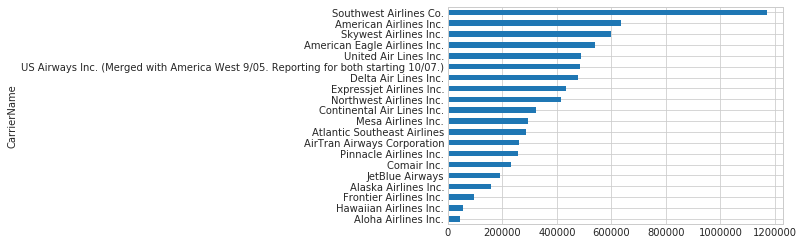

In [38]:
# Plot total cancellations by airline
carrier_cancel = df_flights.groupby(['CarrierName'], as_index = False)['Cancelled'].count().sort_values('Cancelled')
carrier_cancel.set_index("CarrierName", inplace = True)
carrier_cancel.plot(kind = 'barh', legend = None);

> Southwest, American, Skywest, American Eagle and United airlines had the most cancellations in 2007.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * The relationships between the numeric variables were as expected (ex. a longer distance means more elapsed time, a departure delay results in an arrival delay).  
* There seems to be evidence that time of day when a flight takes place can affect likelihood of experiencing a significant delay.  
* Certain carriers tend to have more cancellations and significant delays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  
* Airports set in rural settings seem more likely to experience delays.
* There was no evidence that the length of flight time or distance flown affect arrival delays.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

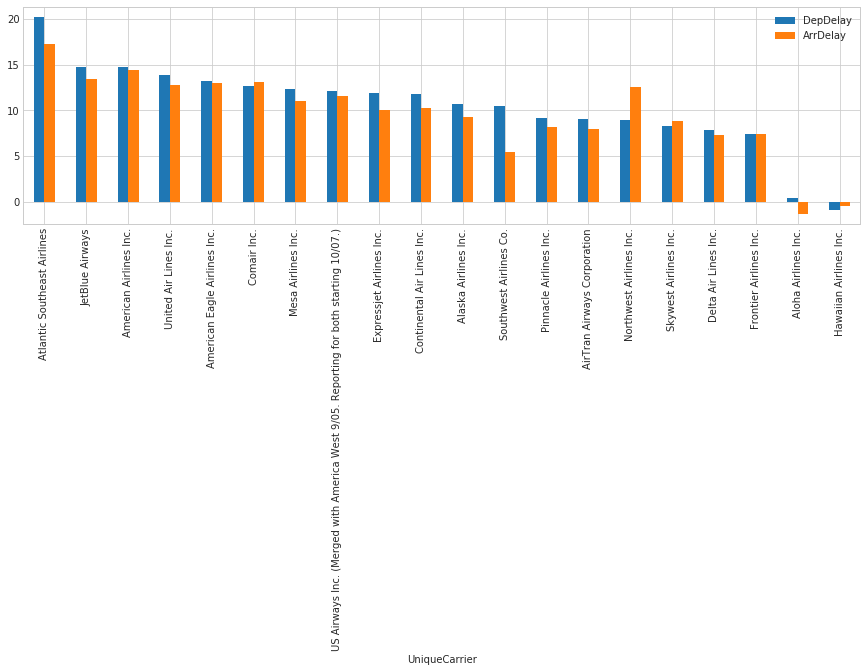

In [39]:
# Plot both arrival and departure delays by airline

carrier = pd.read_csv('carriers.csv')
carrier_dic = dict(carrier.values)
df_flights.groupby('UniqueCarrier').agg({'DepDelay':'mean', 'ArrDelay':'mean'}).rename(index = carrier_dic).sort_values('DepDelay', ascending=False).plot.bar()
#plt.xticks(rotation = 15)
plt.gcf().set_size_inches(15, 4)
plt.show();

> It appears that Atlantic Southeast Airlines had both the worst departure delays and arrival delays in 2007.

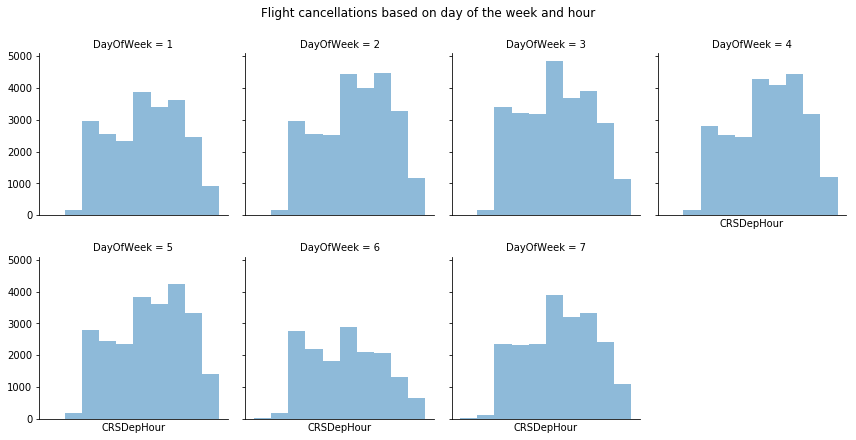

In [23]:
# Plot the number of cancellations based on day of the week and hour of the day
df_sub = df_flights[['Cancelled', 'DayOfWeek', 'CRSDepHour', 'UniqueCarrier', 'CarrierName']]
df_cancelled = df_sub[df_sub['Cancelled'] == 1]
g = sb.FacetGrid(data = df_cancelled, col='DayOfWeek', hue = 'Cancelled', col_wrap = 4)
g = (g.map(plt.hist, 'CRSDepHour', alpha=.5))
g.set(xticks=[]);
g.fig.suptitle('Flight cancellations based on day of the week and hour', y = 1.05);

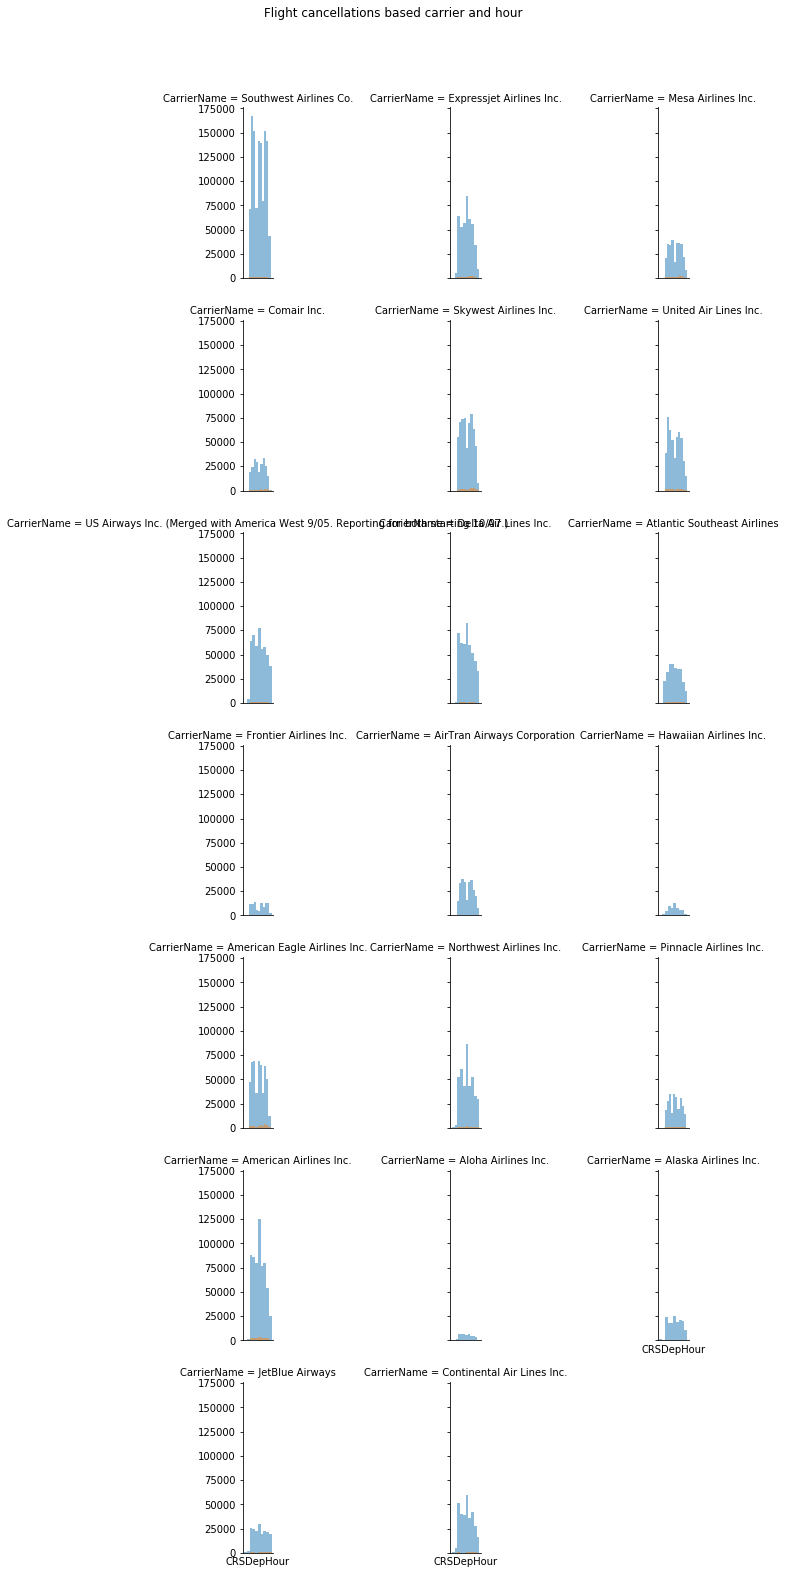

In [26]:
# Cancellations by carrier based on hour of the day and day of the week
g = sb.FacetGrid(data = df_sub, col = 'CarrierName', hue = 'Cancelled', col_wrap = 3)
g = (g.map(plt.hist, 'CRSDepHour', alpha = .5))
g.set(xticks = []);
g.fig.suptitle('Flight cancellations based carrier and hour', y = 1.05);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Flight cancellations seem to happen the most in the middle of the day and evenings.  This seems to be true no matter the time of the day or what airline is used.

### Were there any interesting or surprising interactions between features?

> It is no surprise that departure and arrival delays are similar, but it is surprising that they are not closer to equal for each airline.

In [22]:
# Save final flight dataframe to CSV for use in slide show
df_flights.to_csv('df_flights.csv', index = False, encoding = 'utf-8')